<a href="https://colab.research.google.com/github/Jonah-30/neural-network-for-fashion_mnistst-dataset/blob/main/neuralNetworkipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries and datasets.

In [78]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# seperate dataset into inputs and outputs and training and testing
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# normalize images by scaling the pixels from 0 to 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# reshape the images
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

# Reshape the outputs
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# the names of each classification
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Anke Boot']

x_train shape: (60000, 28, 28) y_train shape: (60000,)


Display sample images.

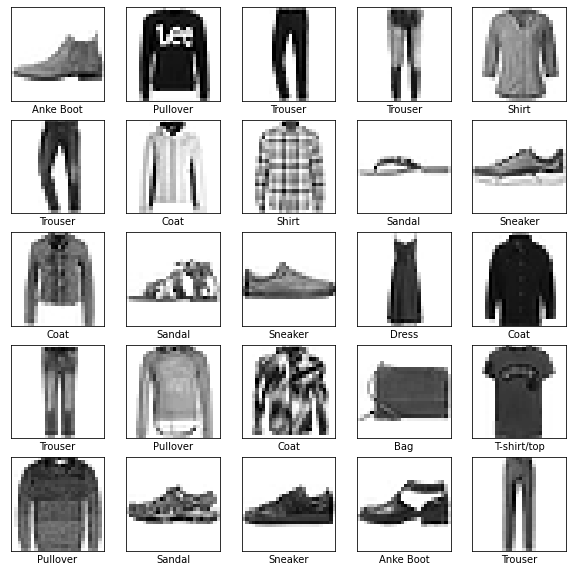

In [103]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.reshape(x_test[i], newshape=(28, 28)), cmap=plt.cm.binary)
    for j in range(0, 10):
      if y_test[i][j] == 1:
        number = j
        break
    plt.xlabel(class_names[j])
plt.show()

Setting up the neural network.

In [70]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D


# add layers
model = tf.keras.Sequential()
model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

# setup the back-propagation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 25, 25, 64)        1088      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 9, 9, 64)          65600     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_31 (Dense)             (None, 10)              

Train the model.

In [71]:
history = model.fit(x_test, y_test, batch_size=32, epochs=10, validation_data=(x_train, y_train))

Epoch 1/10
313/313 [==============================] - 40s 126ms/step - loss: 1.0335 - accuracy: 0.6150 - val_loss: 0.6094 - val_accuracy: 0.7755
Epoch 2/10
313/313 [==============================] - 39s 125ms/step - loss: 0.5170 - accuracy: 0.8081 - val_loss: 0.4287 - val_accuracy: 0.8472
Epoch 3/10
313/313 [==============================] - 39s 126ms/step - loss: 0.4124 - accuracy: 0.8536 - val_loss: 0.4097 - val_accuracy: 0.8507
Epoch 4/10
313/313 [==============================] - 40s 126ms/step - loss: 0.3638 - accuracy: 0.8629 - val_loss: 0.4149 - val_accuracy: 0.8500
Epoch 5/10
313/313 [==============================] - 40s 126ms/step - loss: 0.3248 - accuracy: 0.8815 - val_loss: 0.3848 - val_accuracy: 0.8564
Epoch 6/10
313/313 [==============================] - 40s 127ms/step - loss: 0.2927 - accuracy: 0.8911 - val_loss: 0.4015 - val_accuracy: 0.8586
Epoch 7/10
313/313 [==============================] - 40s 127ms/step - loss: 0.2580 - accuracy: 0.9057 - val_loss: 0.3598 - val_ac

Evaluate the loss and accuracy of the testing dataset

313/313 - 4s - loss: 0.1560 - accuracy: 0.9432
0.155992329120636 0.9431999921798706


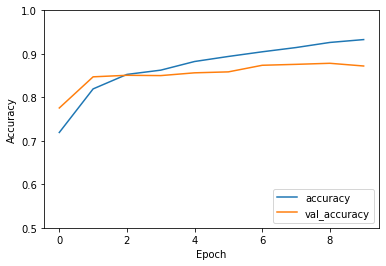

In [72]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(test_loss, test_acc)


Save the model.

In [73]:
model.save('image_classifier_fashion_mnist_net.model')
new_model = tf.keras.models.load_model('image_classifier_fashion_mnist_net.model')

INFO:tensorflow:Assets written to: image_classifier_fashion_mnist_net.model/assets


Plot the results on test set.

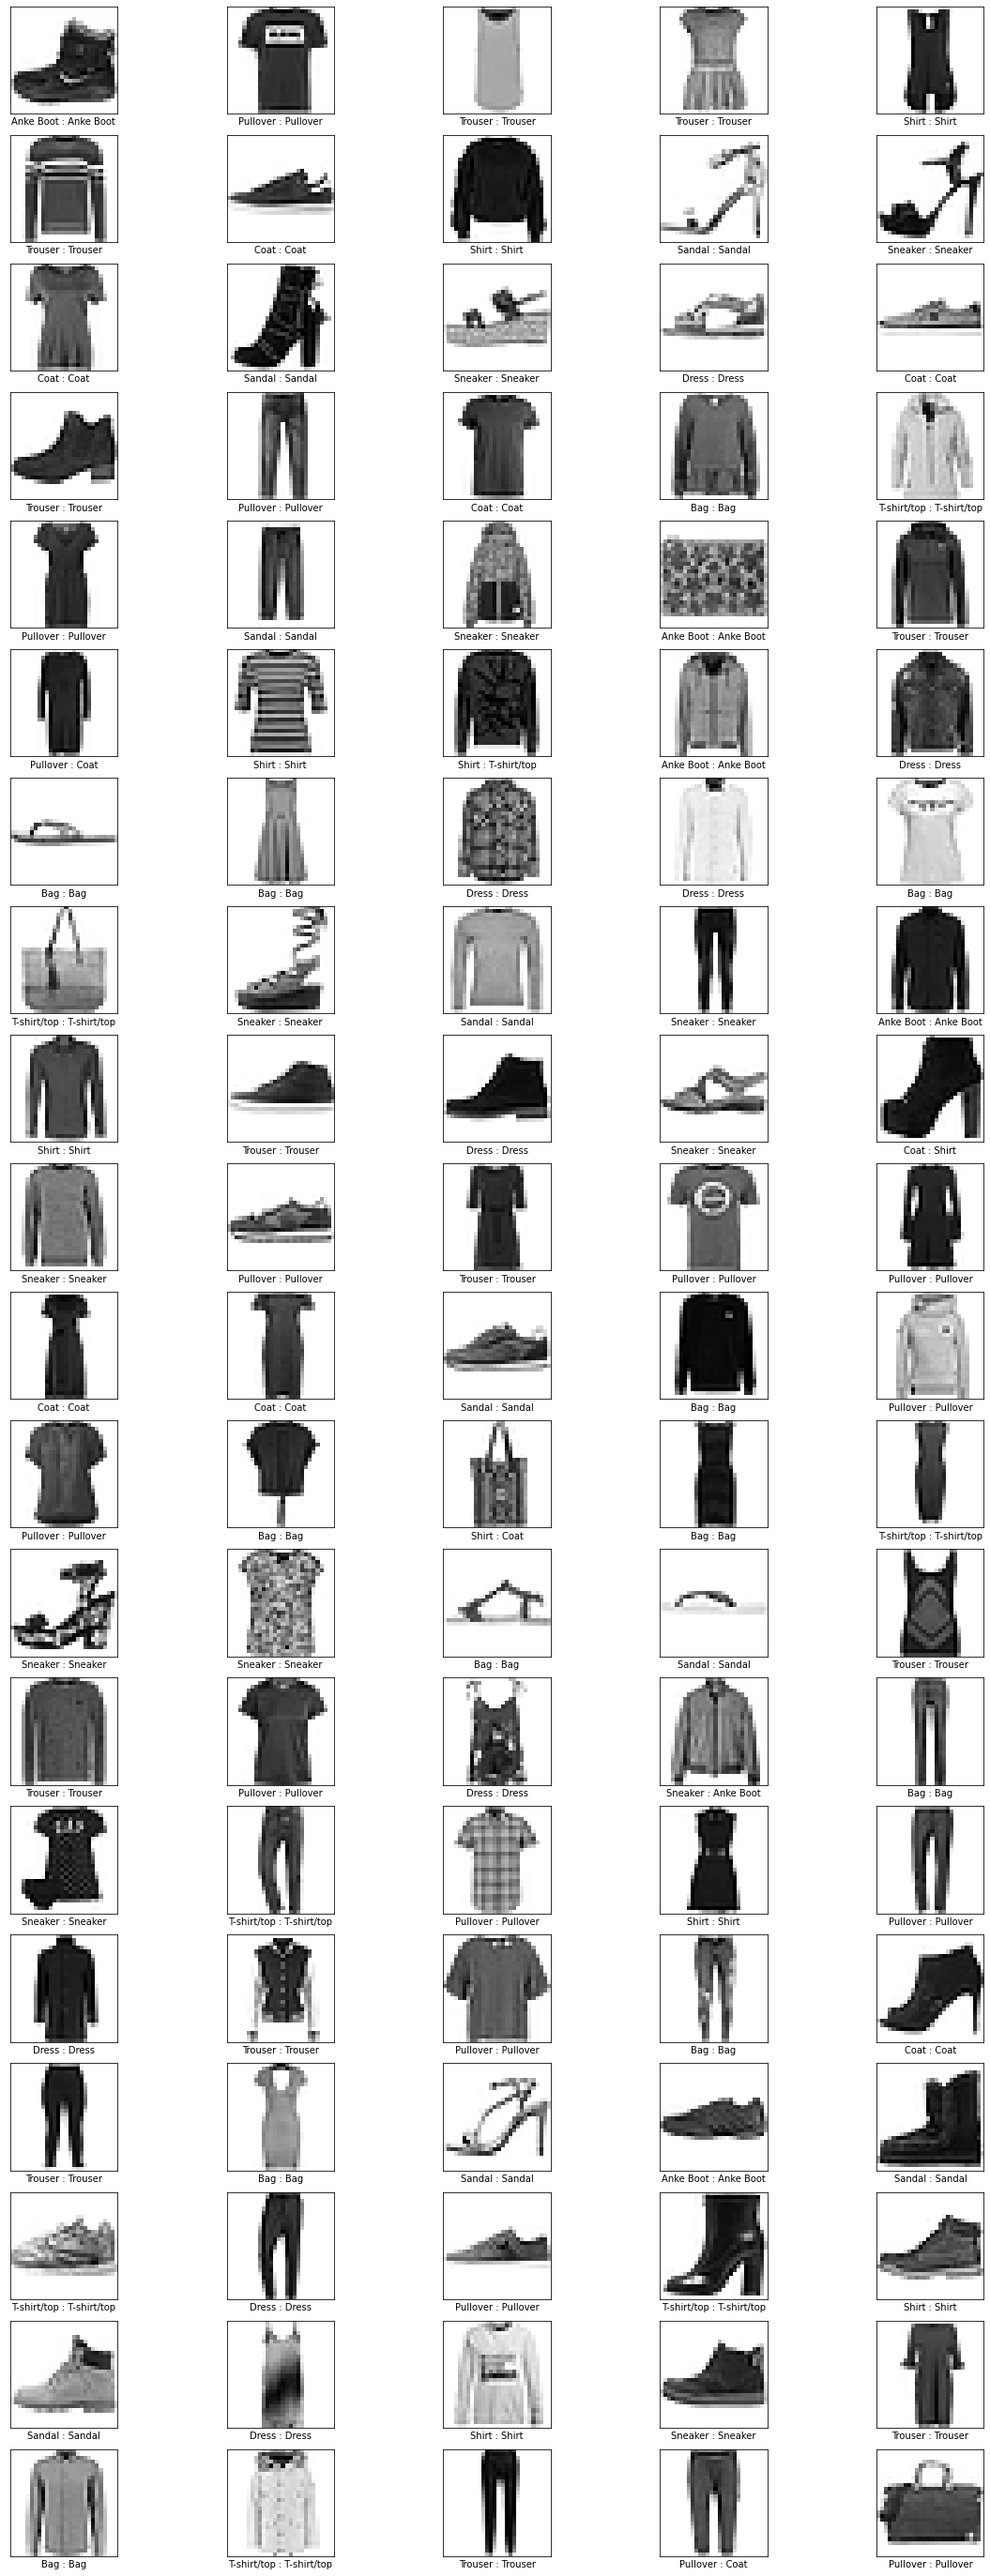

In [99]:
predictions=new_model.predict([x_test])
plt.figure(figsize=(20,50))
for i in range(100):
    plt.subplot(20,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.reshape(x_train[i], newshape=(28, 28)), cmap=plt.cm.binary)
    for j in range(0, 10):
      if y_test[i][j] == 1:
        number = j
        break
    plt.xlabel(str(class_names[np.argmax(predictions[i])] + ' : ' + class_names[j]))
plt.show()